<a href="https://colab.research.google.com/github/michaellopes16/ExplainabilityEnsembleAPI/blob/main/TesteAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install XaI-Ensemble-VOCs-API==0.3.7

  Preparing metadata (setup.py) ... done
  Created wheel for XaI-Ensemble-VOCs-API: filename=XaI_Ensemble_VOCs_API-0.3.7-py3-none-any.whl size=8271 sha256=f0b32b6240bfebc7ad0d145157d34db7b028396fc9459ce070a1ff94cc07736a
  Stored in directory: /root/.cache/pip/wheels/f3/e2/98/cadc9348be6dc8d0243fc44c2a3d6783766e8c77d296fe1da3
Successfully built XaI-Ensemble-VOCs-API
  Attempting uninstall: XaI-Ensemble-VOCs-API
    Found existing installation: XaI_Ensemble_VOCs_API 0.3.6
    Uninstalling XaI_Ensemble_VOCs_API-0.3.6:
      Successfully uninstalled XaI_Ensemble_VOCs_API-0.3.6


In [4]:
from xaiensembleapi import xaiensemble as xai_e

# **LOAD DATA**

In [5]:
import tensorflow as tf
from keras.models import load_model
# Create an instance of the class
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6
features_name = ["TGS-826","TGS-2611","TGS-2603","TGS-813","TGS-822","TGS-2602","TGS-823"]
class_names = ['Albicans', 'Glabrata', 'Haemulonii', 'Kodamaea_ohmeri', 'Krusei', 'Parapsilosis']
api = xai_e.ExplainableAPI(features_name)
X_train, y_train = api.load_data(path="AllCandidas_TRAIN.csv", sep=",")  # Replace with actual path and separator
X_test, y_test = api.load_data(path="AllCandidas_TEST.csv", sep=",")  # Replace with actual path and separator
SAMPLE_INDEX = 5# amostra que será selecionada do df de teste
model = tf.keras.models.load_model('/content/best_model.hdf5')

main = xai_e.Run_methods(api)
# df = api.group_sensor(features_name, X_test[SAMPLE_INDEX])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [9]:
y_train

array([1., 6., 1., 2., 5., 1., 2., 2., 1., 2., 4., 5., 3., 1., 3., 5., 2.,
       5., 1., 6., 2., 6., 1., 5., 1., 2., 2., 6., 6., 5., 2., 1., 5., 4.,
       1., 1., 1., 6., 1., 1., 5., 6., 1., 2., 6., 4., 2., 2., 1., 6., 5.,
       5., 5., 6., 5., 2., 6., 5., 2., 2., 6., 6., 6., 2., 4., 5., 5., 3.,
       6., 4., 2., 1., 5., 5., 1., 6., 5., 5., 2., 2., 1., 1., 1., 4., 6.,
       1., 5., 5., 4., 5., 4., 2., 2., 6., 4., 5., 2., 4., 5., 3., 2., 6.,
       5., 2., 1., 5., 6., 2., 6., 6., 4., 5., 6., 5., 5., 6., 2., 4., 2.,
       2., 1., 3., 1., 2., 6., 2., 6., 5., 5., 6., 5., 6., 6., 3., 3., 4.,
       5., 2., 6., 2., 6., 2., 2., 4., 5., 4., 6., 6., 1., 6., 4., 2., 5.,
       5., 5., 1., 5., 6., 1., 5., 6., 1., 3., 3., 1., 6., 3., 1., 6., 4.,
       2., 2., 2., 1., 6., 6., 4., 2., 2., 2., 1., 2., 4., 6., 3., 1., 2.,
       1., 6., 2., 6., 1., 5., 2., 5., 1., 5., 1., 5., 1., 5., 1., 3., 3.,
       2., 1., 2., 1., 6., 4., 1., 1., 6., 2., 6., 2., 2., 2., 6., 6., 1.,
       5., 3., 6., 2., 1.

In [9]:
data = api.get_samples_from_db(X_train, y_train,api.get_predicted_class(X_train[SAMPLE_INDEX], model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [10]:
y_train[SAMPLE_INDEX]

1.0

In [11]:
api.get_predicted_class(X_train[SAMPLE_INDEX], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


1

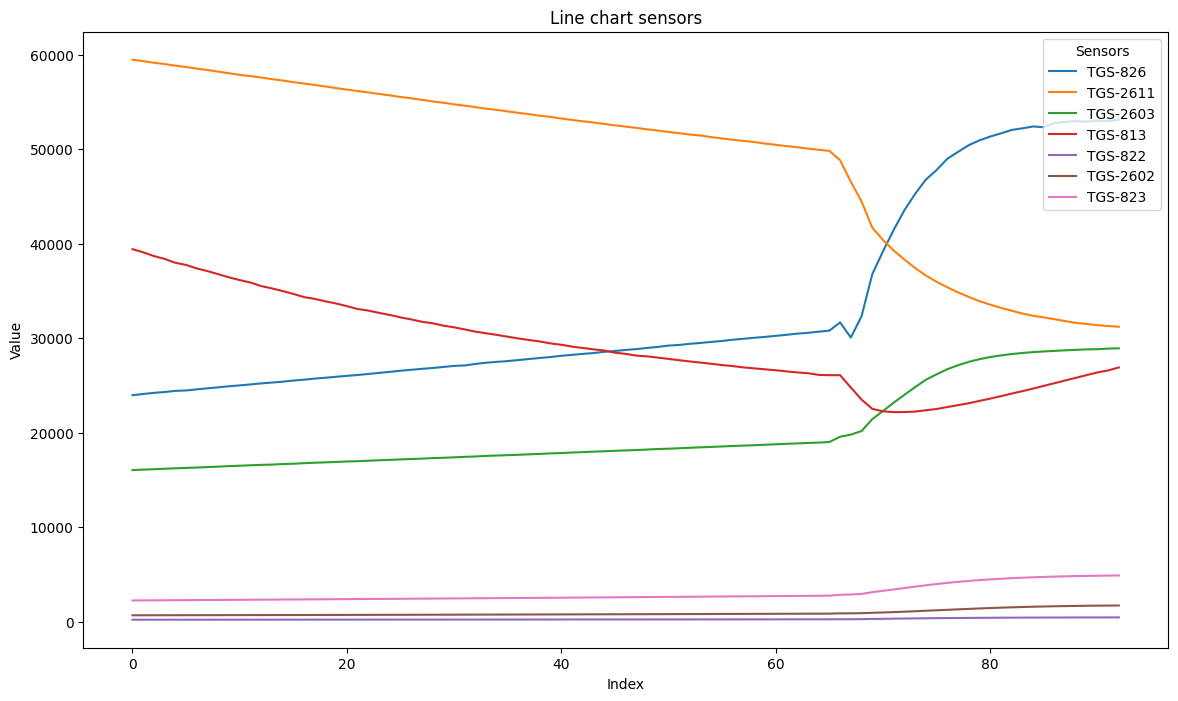

In [12]:
df = api.group_sensor(features_name, X_train[SAMPLE_INDEX])
api.plot_chart_line_df(df)

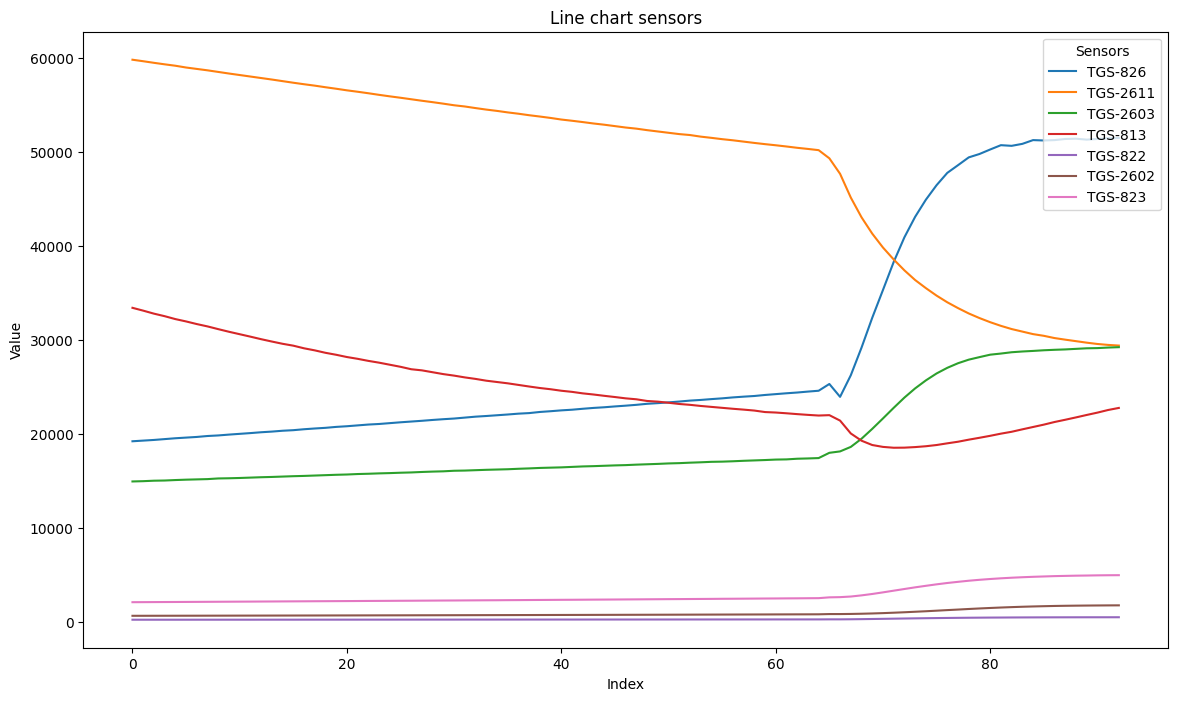

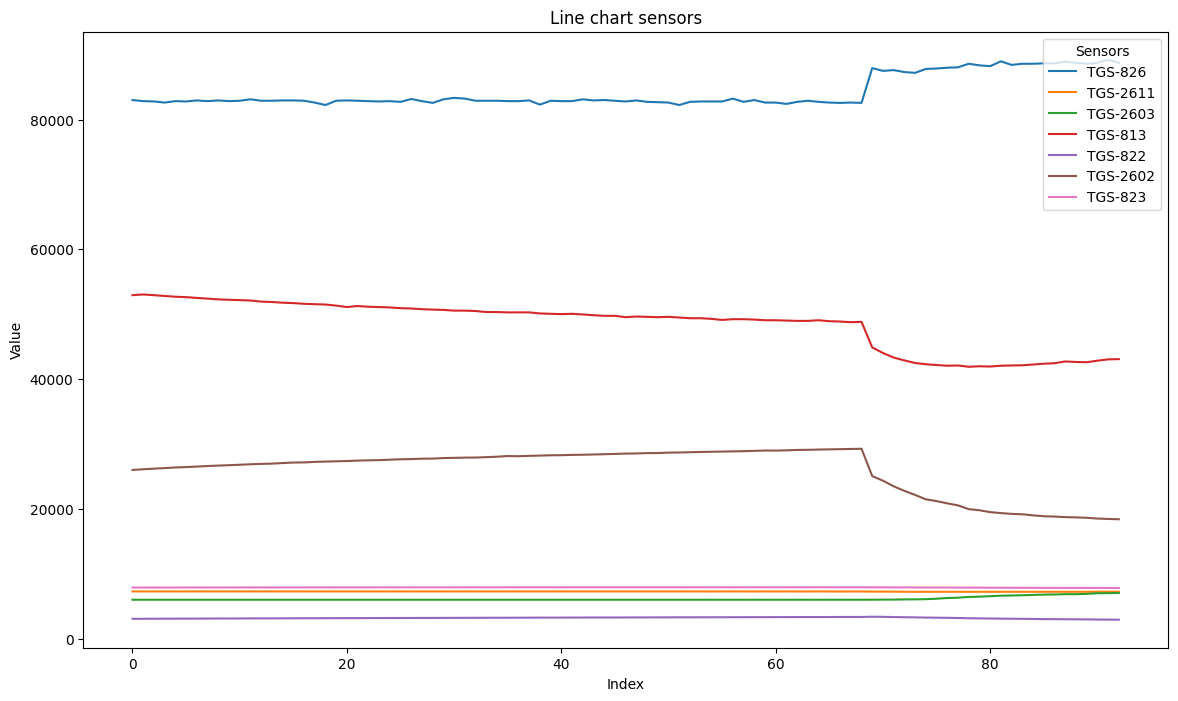

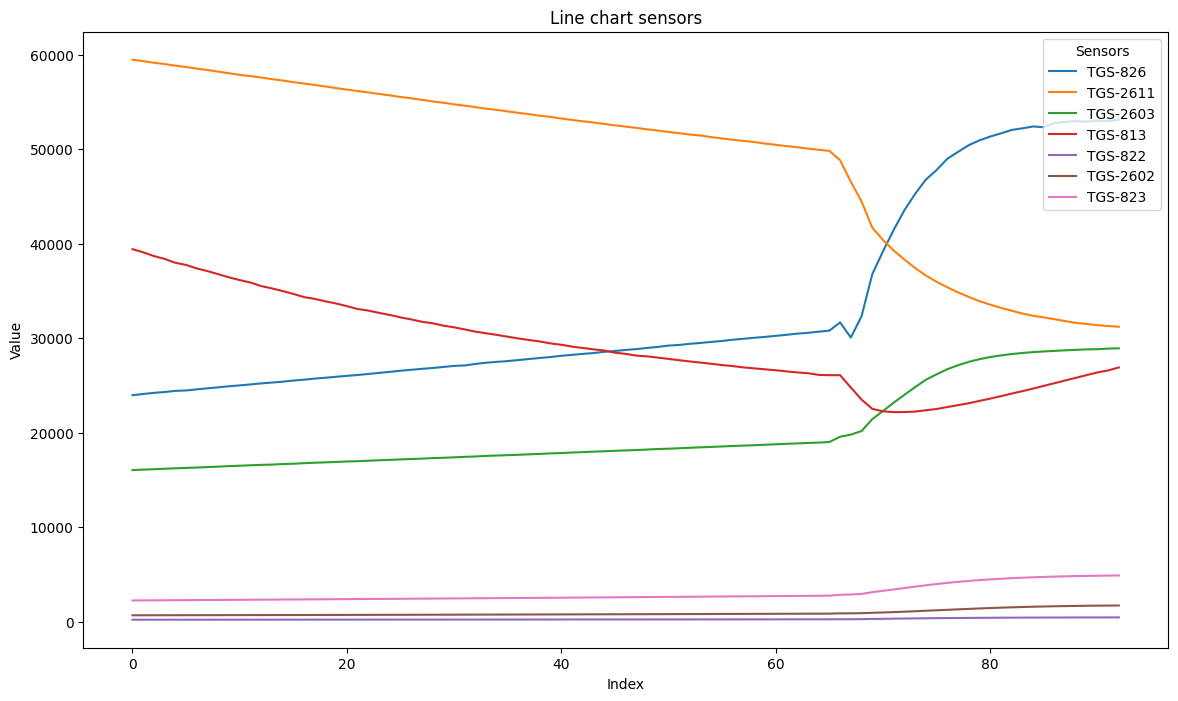

In [13]:
api.plot_samples_db(data)

In [14]:
df_LIME, df_shap, df_GRAD, df_final, df_caounts = main.run_all_methods_mult(X_train, X_test,SAMPLE_INDEX, model, class_names, 4,'conv1d_30', 4)

Running LIME...
Cicle: 1 of 4...
Running LIME...
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Cicle: 2 of 4...
Running LIME...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Cicle: 3 of 4...
Running LIME...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Cicle: 4 of 4...
Running LIME...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Running SHAP...
Cicle: 1 of 4...
Running SHAP...
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step


PermutationExplainer explainer: 2it [00:31, 31.72s/it]               

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Cicle: 2 of 4...
Running SHAP...
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step


PermutationExplainer explainer: 2it [00:28, 28.24s/it]               

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Cicle: 3 of 4...
Running SHAP...
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step


PermutationExplainer explainer: 2it [00:42, 42.45s/it]               

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Cicle: 4 of 4...
Running SHAP...
4073/4073 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step


PermutationExplainer explainer: 2it [00:42, 42.47s/it]               

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Running GRAD_CAM...
Cicle: 1 of 4...
Running GRAD_CAM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


tf.Tensor(0.9999733, shape=(), dtype=float32)
Cicle: 2 of 4...
Running GRAD_CAM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
tf.Tensor(0.9999733, shape=(), dtype=float32)
Cicle: 3 of 4...
Running GRAD_CAM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
tf.Tensor(0.9999733, shape=(), dtype=float32)
Cicle: 4 of 4...
Running GRAD_CAM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tf.Tensor(0.9999733, shape=(), dtype=float32)


In [15]:
df_caounts

,Sensors,Repeats
0,TGS-2611,2
1,TGS-822,2
2,TGS-826,2


In [16]:
df_final

,Column,Mean,DataFrame
6,TGS-2611,1.041468,SHAP
1,TGS-2611,1.404521,GRAD
1,TGS-822,-0.519231,LIME
2,TGS-822,-0.845406,GRAD
9,TGS-826,1.273660,SHAP
0,TGS-826,0.936426,SHAP


# **PLOTS AND MAPPING**

In [17]:
df_LIME.DataFrame[0]

'LIME'

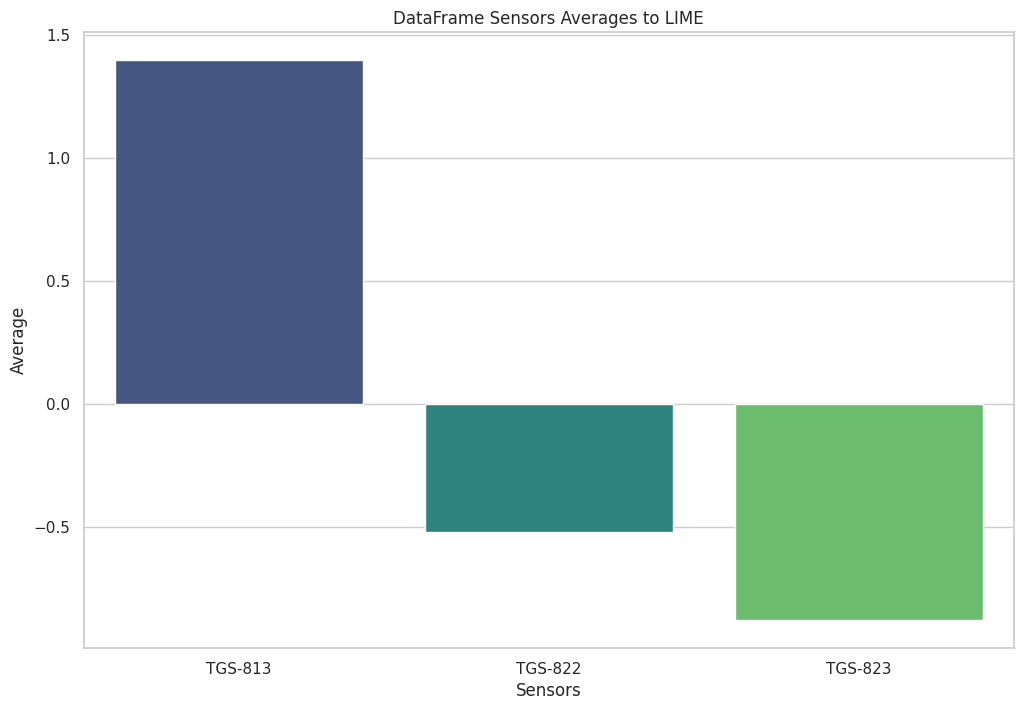

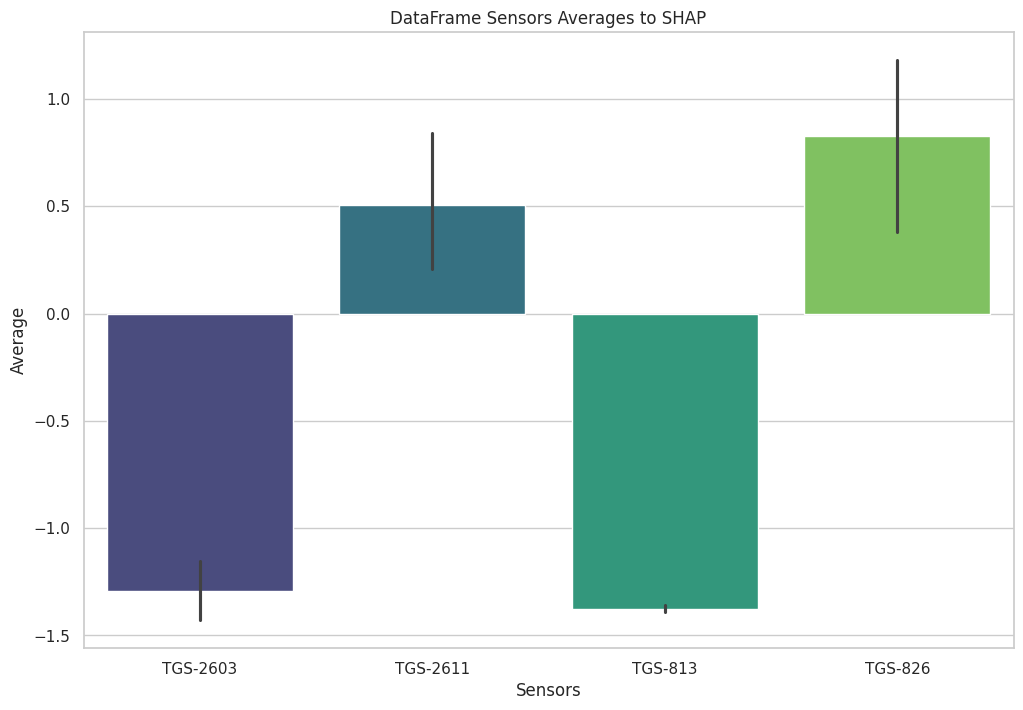

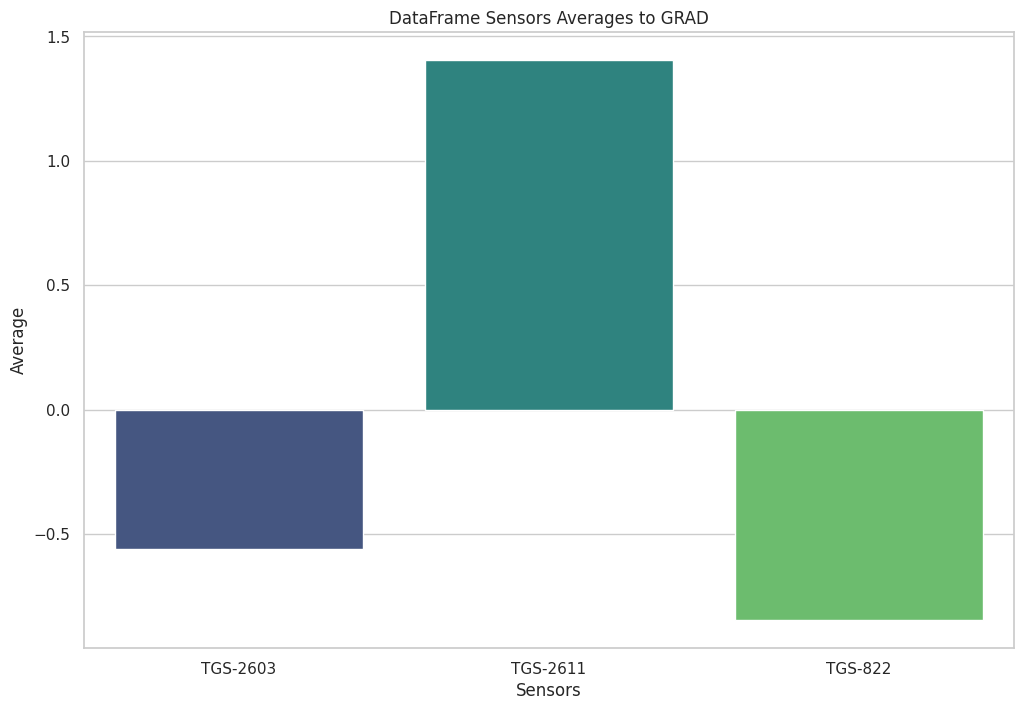

In [18]:
main.plot_all_bar_charts(df_LIME, df_shap, df_GRAD)

In [19]:
main.print_result(df_caounts,'MappingVOC_DB.db',api.QUERY_FUNGI, api.QUERY_SENSOR)

Os 3 fungos mais compatíveis com o sensor TGS-2611 são:
C. albicans com 2 categorias compatíveis:
  - Alcohols: Sensor (2 vezes), Fungo (6 vezes)
  - Hydrocarbons: Sensor (1 vezes), Fungo (3 vezes)

C. glabrata com 2 categorias compatíveis:
  - Hydrocarbons: Sensor (1 vezes), Fungo (3 vezes)
  - Alcohols: Sensor (2 vezes), Fungo (3 vezes)

C. haemulonii com 2 categorias compatíveis:
  - Hydrocarbons: Sensor (1 vezes), Fungo (3 vezes)
  - Alcohols: Sensor (2 vezes), Fungo (1 vezes)

Os 3 fungos mais compatíveis com o sensor TGS-822 são:
C. haemulonii com 2 categorias compatíveis:
  - Inorganic Gases: Sensor (1 vezes), Fungo (2 vezes)
  - Alcohols: Sensor (1 vezes), Fungo (1 vezes)

C. kodamaea_ohmeri com 2 categorias compatíveis:
  - Alcohols: Sensor (1 vezes), Fungo (3 vezes)
  - Inorganic Gases: Sensor (1 vezes), Fungo (2 vezes)

C. krusei com 2 categorias compatíveis:
  - Inorganic Gases: Sensor (1 vezes), Fungo (2 vezes)
  - Alcohols: Sensor (1 vezes), Fungo (1 vezes)

Os 3 fungos m

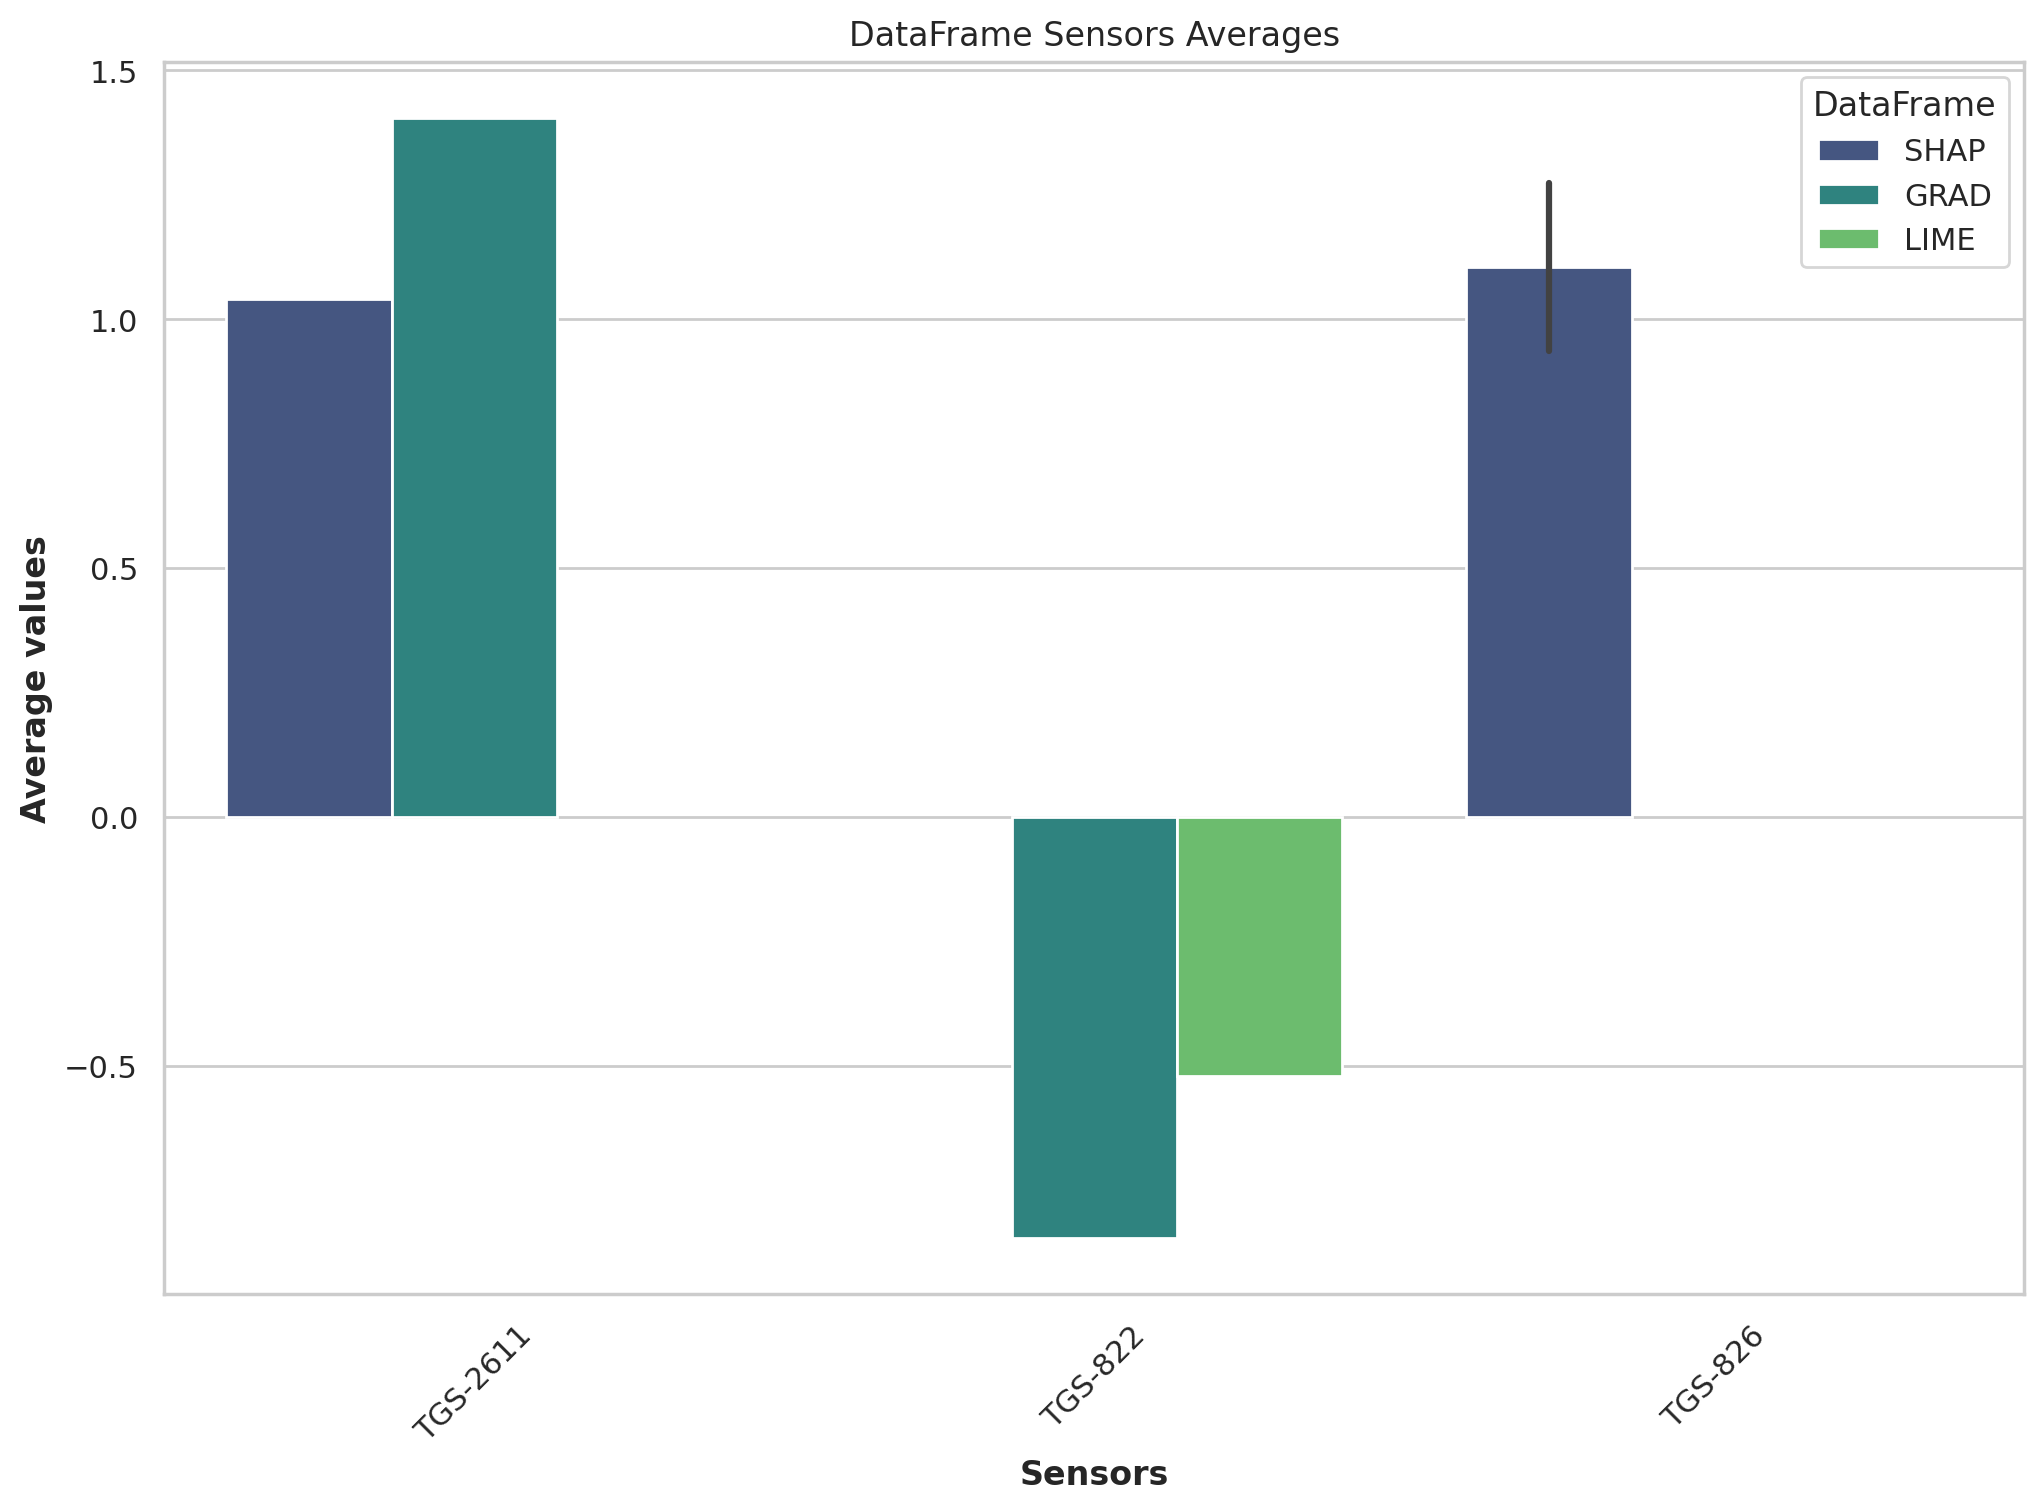

In [20]:
main.plot_bar_chart_all_methods(df_final)